## <font color="maroon"><h4 align="center">Handling Missing Data - replace method</font>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("weather_data_missing_data.csv")
df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,-99999,7,Sunny
2,01-03-2017,28,-99999,Snow
3,01-04-2017,-99999,7,0
4,01-05-2017,32,-99999,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


**Replacing single value**

In [12]:
new_df = df.replace("-99999", value=np.NaN)
new_df=df.replace("0",value="NONE")
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,-99999,7,Sunny
2,01-03-2017,28,-99999,Snow
3,01-04-2017,-99999,7,NONE
4,01-05-2017,32,-99999,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,NONE
7,01-06-2017,34 F,5,NONE
8,01-06-2017,34 C,20mph,NONE
9,01-06-2017,34,20mph,NONE


**Replacing list with single value**

In [11]:
new_df = df.replace(to_replace=["-99999","-88888"], value=0)
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,0,7,Sunny
2,01-03-2017,28,0,Snow
3,01-04-2017,0,7,0
4,01-05-2017,32,0,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34 F,5,0
8,01-06-2017,34 C,20mph,0
9,01-06-2017,34,20mph,0


**Replacing per column**

In [4]:
#print(df.info())
new_df = df.replace({
        'temperature': "-99999",
        'windspeed': "-99999",
        'event': '0'
    }, np.nan)
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,NaN
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,NaN
7,01-06-2017,34 F,5,NaN
8,01-06-2017,34 C,20mph,NaN
9,01-06-2017,34,20mph,NaN


**Replacing by using mapping**

In [18]:
new_df = df.replace({
        '-99999': np.nan,
        "0": 'sunny',
    })
new_df

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,NaN,7,Sunny
2,01-03-2017,28,NaN,Snow
3,01-04-2017,NaN,7,sunny
4,01-05-2017,32,NaN,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,sunny
7,01-06-2017,34 F,5,sunny
8,01-06-2017,34 C,20mph,sunny
9,01-06-2017,34,20mph,sunny


**Regex**

In [5]:
# when windspeed is 6 mph, 7 mph etc. & temperature is 32 F, 28 F etc.
new_df = df.replace({'temperature': '[A-Zanp.z]', 'windspeed': '[A-Za-z]'},'',
                                                                    regex=True) 
new_df      

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,-99999,7,Sunny
2,01-03-2017,28,-99999,Snow
3,01-04-2017,-99999,7,0
4,01-05-2017,32,-99999,Rain
5,01-06-2017,31,2,Sunny
6,01-06-2017,34,5,0
7,01-06-2017,34,5,0
8,01-06-2017,34,20,0
9,01-06-2017,34,20,0


**Replacing list with another list**

In [30]:
df = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [70]:
new_df=df.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4])
new_df

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


In [67]:
print(df['score'].unique())
print(df['score'].nunique())
print(df['score'].value_counts())
sum=np.sum(df.values)
print("Sum: ",sum)

['exceptional' 'average' 'good' 'poor']
4
score
exceptional    2
average        2
good           1
poor           1
Name: count, dtype: int64
Sum:  exceptionalaveragegoodpooraverageexceptionalrobmayaparthivtomjulianerica


In [72]:
# to calculate average
new_df.mean()
new_df["score"].mean()
print(new_df)
#to find total number of rows
#new_df.shape
#new_df.count()
#new_df.info()
len(new_df.index)

TypeError: Could not convert ['robmayaparthivtomjulianerica'] to numeric

In [25]:
#aad new column in the data frame
new_df["email"]=df["student"]+"@mycompany.com"
new_df

,score,student,email
0,A,rob,rob@mycompany.com
1,C,maya,maya@mycompany.com
2,B,parthiv,parthiv@mycompany.com
3,F,tom,tom@mycompany.com
4,C,julian,julian@mycompany.com
5,A,erica,erica@mycompany.com


In [71]:
#display only students with score >2
new_df[(new_df["score"]>2)& (df['student']=="parthiv")]

,score,student
2,3,parthiv


In [32]:
#how many distinct values are there in the frame new_df score column
print(df["score"].value_counts())

#new_df["score"].unique()
df[['score']].nunique()   #will show how many different values are there


score
exceptional    2
average        2
good           1
poor           1
Name: count, dtype: int64


score    4
dtype: int64

([<matplotlib.patches.Wedge at 0x7f33a756f3d0>,
 [Text(0.9612882155216765, 0.5549999699992343, 'exceptional'),
  Text(-1.0392570021753293e-07, -1.1099999999999954, 'average'),
  Text(-1.1099999999999892, 1.5588855029231516e-07, 'good'),
  Text(-0.5549998349957815, 0.961288293465938, 'poor')],
 [Text(0.5282755058272276, 0.30499998351309265, '33.3%\n2'),
  Text(-5.7112321741166735e-08, -0.6099999999999974, '33.3%\n2'),
  Text(-0.609999999999994, 8.56684825930741e-08, '16.7%\n1'),
  Text(-0.304999909322006, 0.5282755486614614, '16.7%\n1')])

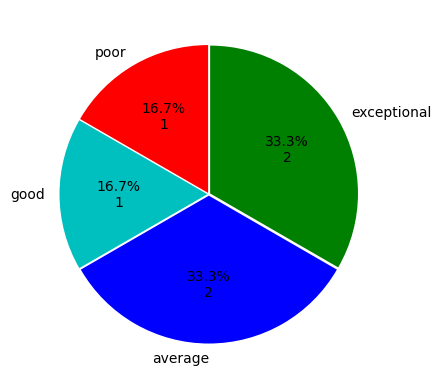

In [63]:
def func(pct,allvals):
    absolute=int(pct/100*np.sum(allvals))
    return "{0:.1f}%\n{1:d}".format(pct,absolute)

df1=df["score"].value_counts()
import matplotlib.pyplot as plt
plt.pie(df1.values,labels=df1.index,autopct= lambda pct: func(pct,df1.values),colors=['g','b','c','r'], explode=(0.01,0.01,0.01,0.01),counterclock=False,startangle=90)